In [1]:
from PIL import Image
from IPython.display import display
import pytesseract
from pdf2image import convert_from_path, convert_from_bytes
import cv2
from matplotlib import pyplot as plt

In [2]:
# pytesseract.image_to_string(Image.open('shonbs.png'))
# pytesseract.image_to_boxes(Image.open('shonbs.png'))
# pytesseract.image_to_data(Image.open('shonbs.png'))

In [3]:
# images = convert_from_path('knbs.pdf')

In [4]:
# for i, index in images:
#     i.save(f'/pdf/{index}.png')
# for i in images:
#     display(i)

In [5]:
pdf = convert_from_path('./data/DODF.pdf')

In [6]:
pdf[4]
pdf[4].save('./data/dodf_pag5.png')


In [7]:
# img = cv2.imread('../shonbs.png')
img = cv2.imread('./data/dodf_pag5.png')

d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

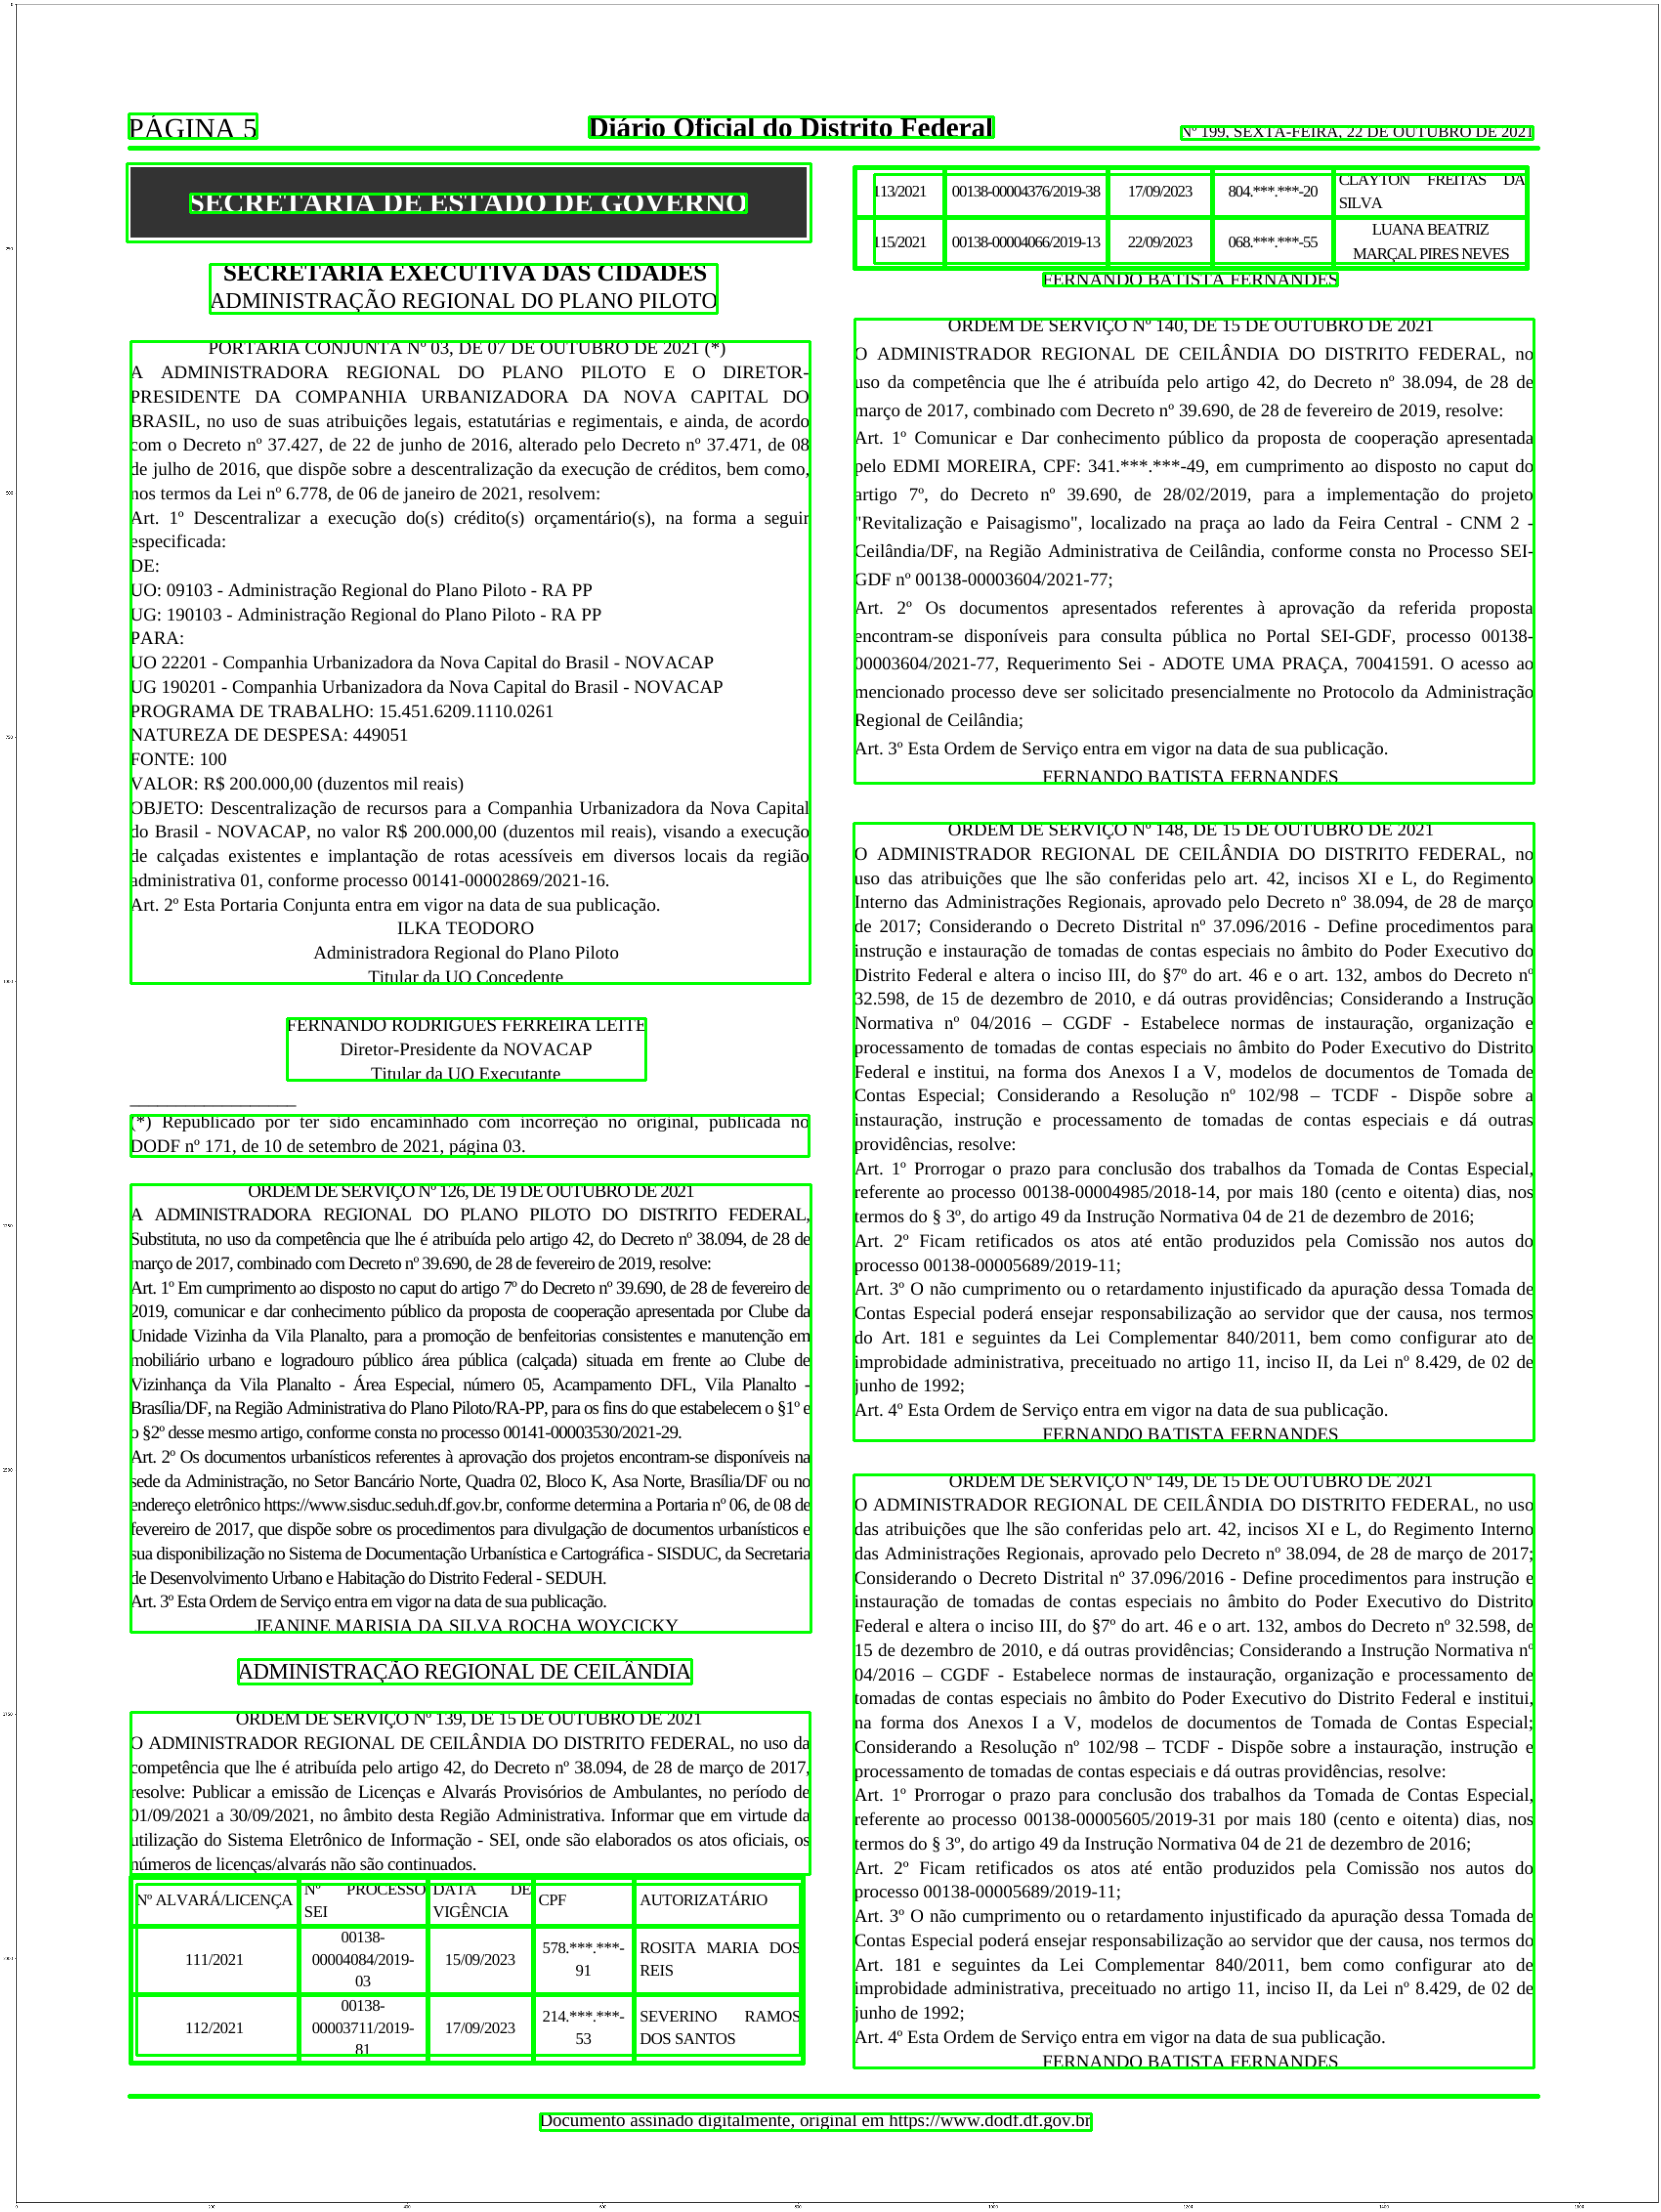

In [8]:
n_boxes = len(d['level'])
covered_areas = []
for i in range(n_boxes):
    if d['level'][i] == 2:

        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

        already_covered = 0
        for x_, y_, w_, h_ in covered_areas:
            if x_ <= x and y_ <= y_ and y_ + h_ >= y + h and x + w < x_ +  w_:
                already_covered = 1
                break
        if not already_covered:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            covered_areas.append((x,y,w,h))

# cv2.startWindowThread()
fig, ax = plt.subplots(figsize=(100, 100))
# cv2.imshow('img', img)
plt.imshow(img)
# ax.imshow(random.rand(8, 90), interpolation='nearest')
plt.show()
# cv2.waitKey()

In [24]:
def get_crop_block_image(index):
    x, y, w, h = covered_areas[index]
    x, y, w, h

    crop = img[y:y+h, x:x+w]
    return crop

cropped = get_crop_block_image(6)

cv2.imshow('cropped', cropped)
cv2.waitKey(0)
cv2.destroyWindow("cropped")